In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

Loading the iris dataset from scikit learn

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

# Import the data
iris = load_iris()

# Getting the response and target variables
X = iris.data
Y = iris.target

# Show built-in description of the dataset
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
# Converting it into a dataframe
iris_data = DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y, columns = ['Species'])

In [4]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return'Virginica'

In [5]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [6]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [7]:
# Now we combine the features and the Target
iris = pd.concat([iris_data, iris_target], axis =1)

In [8]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Lets perform some quick visualization plots of the dataset:


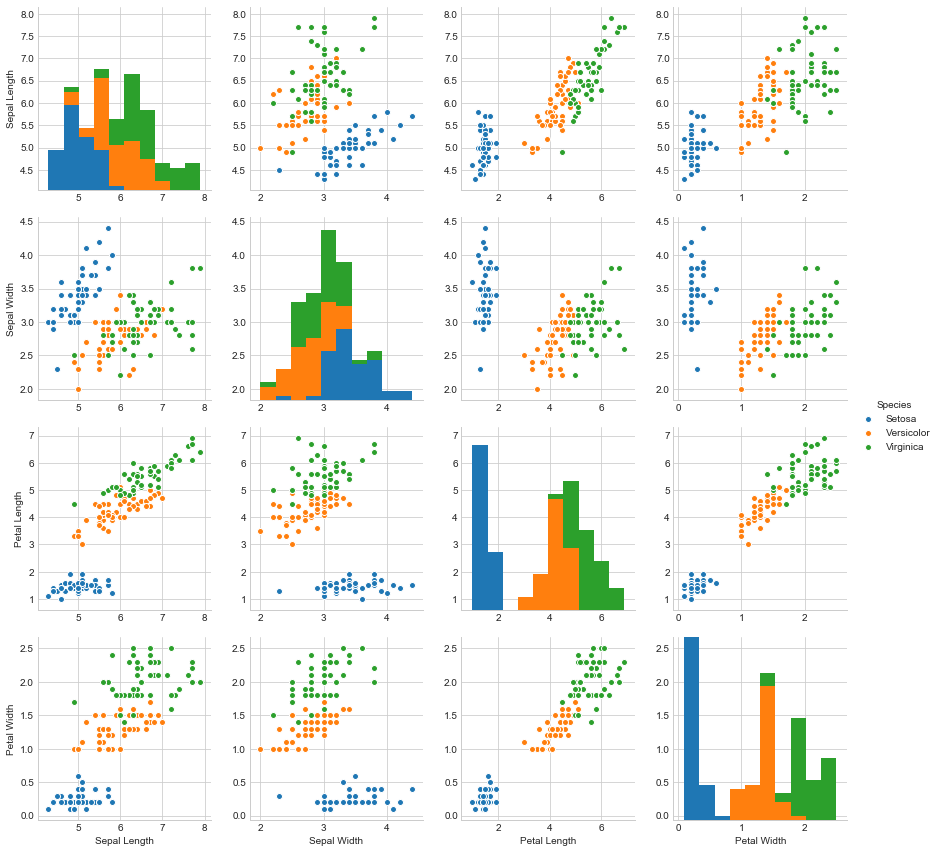

In [9]:
# pairplot of all the different features in the dataset
sns.pairplot(iris, hue = 'Species', size =3)

Here, we can observe that iris type Setosa has features distinct than the other two types.

Lets examine the Sepal Width distributions for all the species:

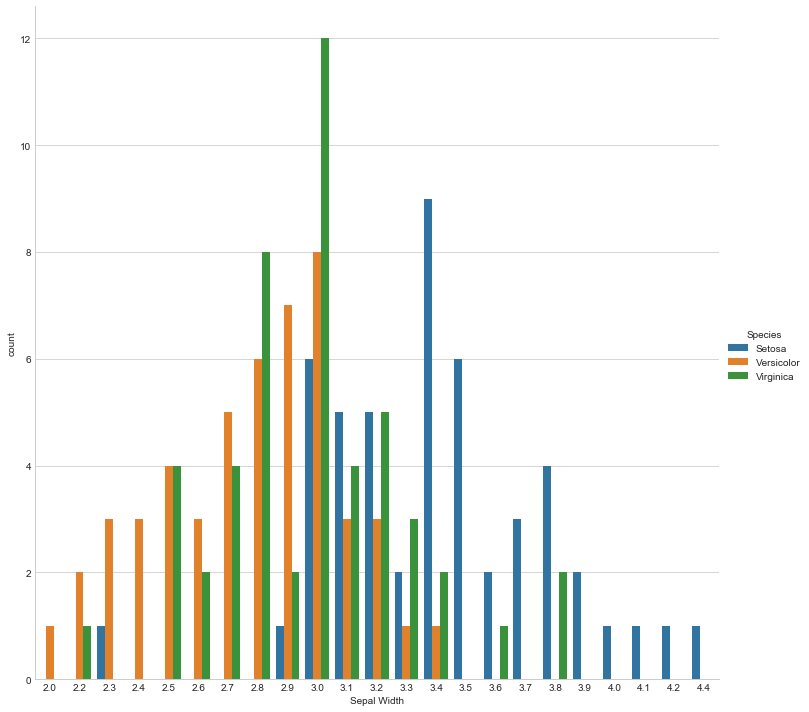

In [10]:
sns.factorplot('Sepal Width', hue = 'Species', data = iris, kind = 'count', size =10)

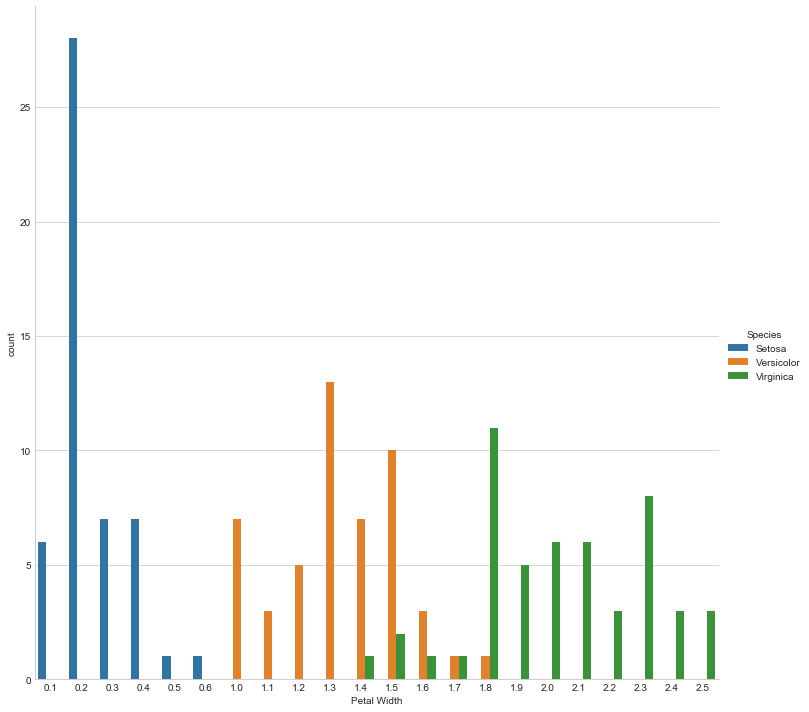

In [11]:
# For Petal.width
sns.factorplot('Petal Width',  hue = 'Species', data = iris, kind = 'count', size =10)

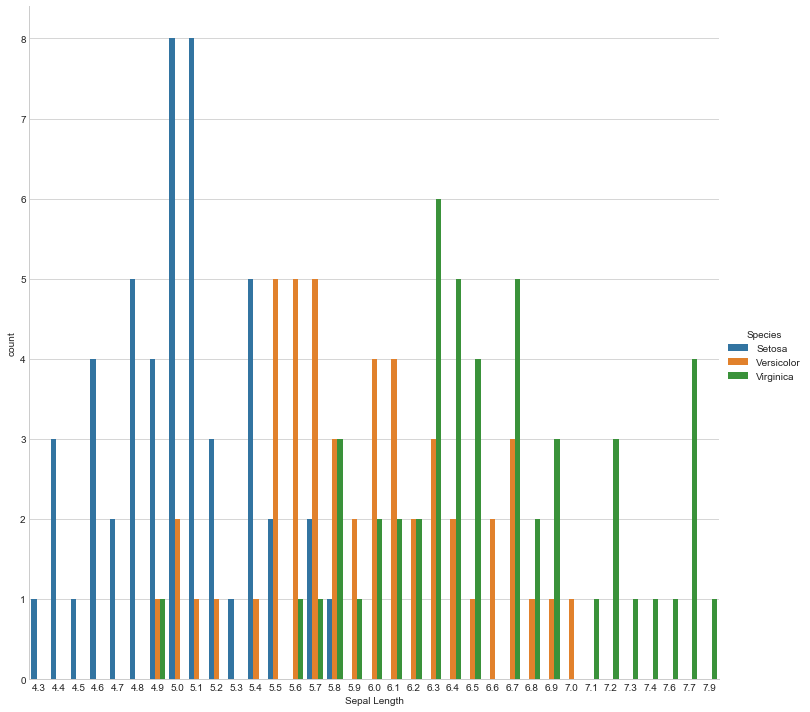

In [12]:
# For Sepal Length
sns.factorplot('Sepal Length',  hue = 'Species', data = iris, kind = 'count', size =10)

Multi-Class Classification using Scikit-Learn

Lets split the data into Training and Test Sets into a 60-40 ratio:

In [13]:
# Import Scikit Learn Log reg
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

logreg = LogisticRegression()

# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.4, random_state = 3)

# Train the model with Training Set
logreg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now that we've trained our model with a training set, let's test our accuracy with the testing set. We'll make a prediction using our model and then check its accuracy.

In [14]:
# predicting on X_test
Y_pred = logreg.predict(X_test)

In [15]:
# importing Testing metrics from scikit learn
from sklearn import metrics
# Check Accuracy
print (metrics.accuracy_score(Y_test, Y_pred))

0.933333333333


So, We have obtained an Accuracy of 93.33% which generally is quite high. But given the cleaned data and how seperated most of the features are , this  is quite likely.

# Using KNN for the Classification

In [16]:
# Import from Scikit Learn
from sklearn.neighbors import KNeighborsClassifier

# lets start with clusters, k = 3

# Import the KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the data
knn.fit(X_train, Y_train)

# Predict X_train
Y_pred = knn.predict(X_test)

# Check Accuracy on the test set
print (metrics.accuracy_score(Y_test, Y_pred))



0.95


Thus, we observe using k = 3 got us an accuracy of 95%.

Lets run for a range of K values and find the Optimal Value:

In [17]:
# test K values through 1 to 20
k_range = range(1,21)

# Set an empty list 
accuracy = []

# repeat for all k values and append the result
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))


Lets plot the different accuracies:
    

Text(0,0.5,'Accuracy')

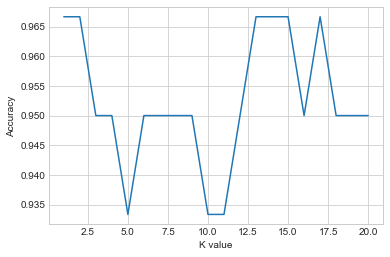

In [18]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel("Accuracy")

Thus, we observe highest accuracy for a lower value of k is obtained for k around 1. Lets see how much is the exact value.


In [19]:
accuracy

[0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996,
 0.93333333333333335,
 0.93333333333333335,
 0.94999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996,
 0.94999999999999996]

Thus, we see that max accuarcy is for a k value of 1 or 2

Thus we performed Multi Class Classification Using Logistic regression and KNN. 

Let us use Naive Bayes technique for the Classification.

In [20]:
# Importing Gaussian Naive Bayes libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

We already have the data ready and broken into train and test set from earlier classifications, so we will move ahead with fitting it into a Naive Bayes classifier

In [21]:
model = GaussianNB()

# Fit the Model
model.fit(X_train, Y_train)

GaussianNB(priors=None)

In [22]:
# Predicting outcomes on the test set
predicted = model.predict(X_test)

expected = Y_test


In [23]:
# Performing Performance Metrics
print (metrics.accuracy_score(expected, predicted))

0.983333333333


Here, we observe that we have a really good accuracy of 98.3% with the Naive Bayes Model.

Lets move onto classfying this dataset using Support vector Machines:

# Iris dataset classification using Support Vector Machines (SVM)

In [25]:
# Loading the SVM library
from sklearn.svm import SVC

# Fitting SVM model
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
# predicting on the test set
predicted = model.predict(X_test)
expected = Y_test


In [27]:
# Checking performance metrics
print(metrics.accuracy_score(predicted,expected))

0.966666666667


Looks, we have achieved a 96.7% accuracy with this SVM model.